In [221]:
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [230]:
sessid = ''
session = requests.Session()
headers ={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
login_url = 'https://spacemgr.lib.ncku.edu.tw/spacemgr/login.php?Lang=C'

###########################################
Date = "2020-06-24" #預約日期
RoomNum = "547" #房號
time_to_res = "01" #e.g. 01;02;03只能選取連續時段
###########################################

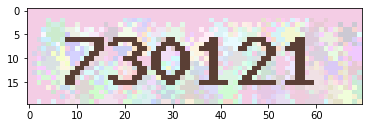

In [231]:
captcha_img_url = 'https://spacemgr.lib.ncku.edu.tw/spacemgr/Captcha.php'
img = session.get(captcha_img_url)
with open('captcha.png','wb') as f:
    f.write(img.content)
    f.flush()
f.close()
im = mpimg.imread('captcha.png')
plt.imshow(im)

In [224]:
def login(param):      
    r = session.post(login_url,headers=headers,data=param)
    res = session.get(reserve_url,headers=headers)
    soup = bs(res.text,"lxml")
    soup.prettify()

In [209]:
def get_query_string(s):
    return s.split('?')[1]

In [232]:
def reserve():
    param={'account':'P76081027','passwd':'Popo85427','Captcha':'730121'}
    login(param)
    waiting_params = 'SpaceCode=Cir_SC&S_R_Date=' + Date + '&RoomNum=' + RoomNum + '&ReservationPeriodList=' + time_to_res
    waiting_url = 'https://spacemgr.lib.ncku.edu.tw/spacemgr/SC_GSR/SC_GSR_ReserveAdd_Waiting.php'
    sess_url = 'https://spacemgr.lib.ncku.edu.tw/spacemgr/common/Sess_setParameter.php'
    OP_url = 'https://spacemgr.lib.ncku.edu.tw/spacemgr/SC_GSR/SC_GSR_ReserveAdd_OP.php'

    # post_sess代表有人訪問
    session.post(sess_url,headers=headers)
    # get送出預定資訊
    r = session.get(waiting_url,headers=headers,params=waiting_params)
    soup = bs(r.text,"lxml")
    # for each in soup.find_all('script'):
    #     print(each)
    # 找出OP需要的query_string
    # for each in soup.find_all('script'):
    #     print(each)
    if(len(soup.find_all('script')) == 5):
        query_string = get_query_string(soup.find_all('script')[4].string)
        # 送Get到OP
        res = session.get(OP_url,headers=headers,params=query_string)
        print("預約成功!")
        print("預約日期: " + Date)
        print("預約房號: " + RoomNum)
        print("預約時段: " + time_to_res)
    else:
        print("預約失敗")



In [233]:
import datetime
import time
while True:
    now = datetime.datetime.now()
    if now.hour == 16 and now.minute == 39:
        reserve()
        break

預約成功!
預約日期: 2020-06-24
預約房號: 547


TypeError: can only concatenate str (not "module") to str